<a href="https://colab.research.google.com/github/digitalpraveen/ML-PROJECTS/blob/main/HEART%20FAILURE%20PREDICTION/HEART_FAILURE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving heart_failure_clinical_records.csv to heart_failure_clinical_records.csv
User uploaded file "heart_failure_clinical_records.csv" with length 12239 bytes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn.linear_model import Perceptron

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

In [ ]:
heart_data=pd.read_csv("heart_failure_clinical_records.csv")
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Is Age and Sex an indicator for Deadth Event ?**

In [ ]:
hist_data =[heart_data["age"].values]
group_labels = ['age']

In [ ]:

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution plot')

fig.show()


Age wise 40 to 80 the spread is High

Age less than 40 age and higher than 80 age people are very low



In [ ]:
fig = px.box(heart_data, x='sex', y='age', points="all")
fig.update_layout(
    title_text="Gender wise Age Spread - Male = 1 Female =0")
fig.show()

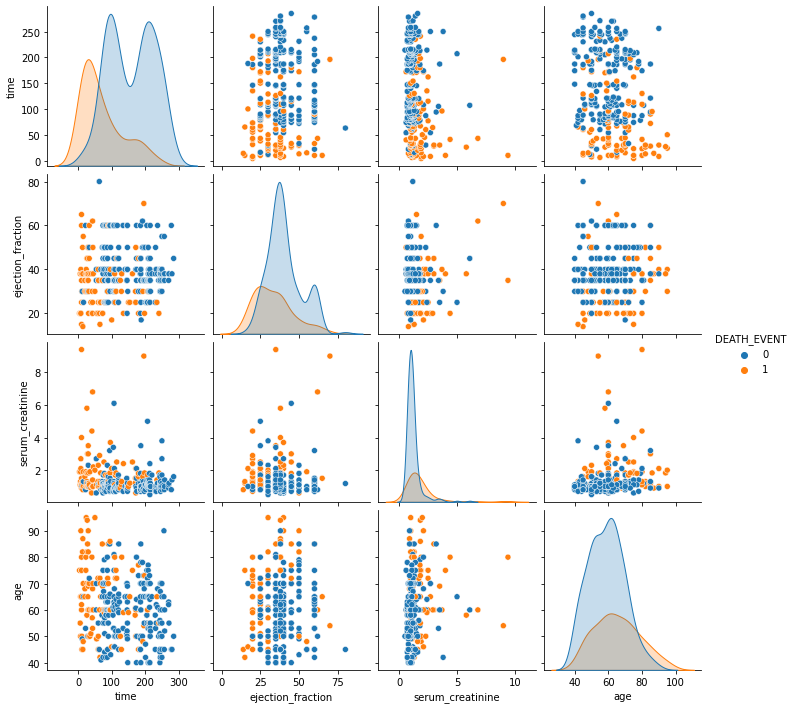

In [ ]:
sns.pairplot(heart_data,vars=['time','ejection_fraction','serum_creatinine','age'],hue="DEATH_EVENT")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



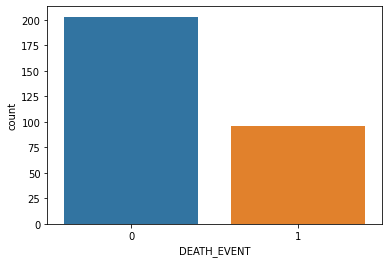

In [ ]:
sns.countplot(heart_data["DEATH_EVENT"])

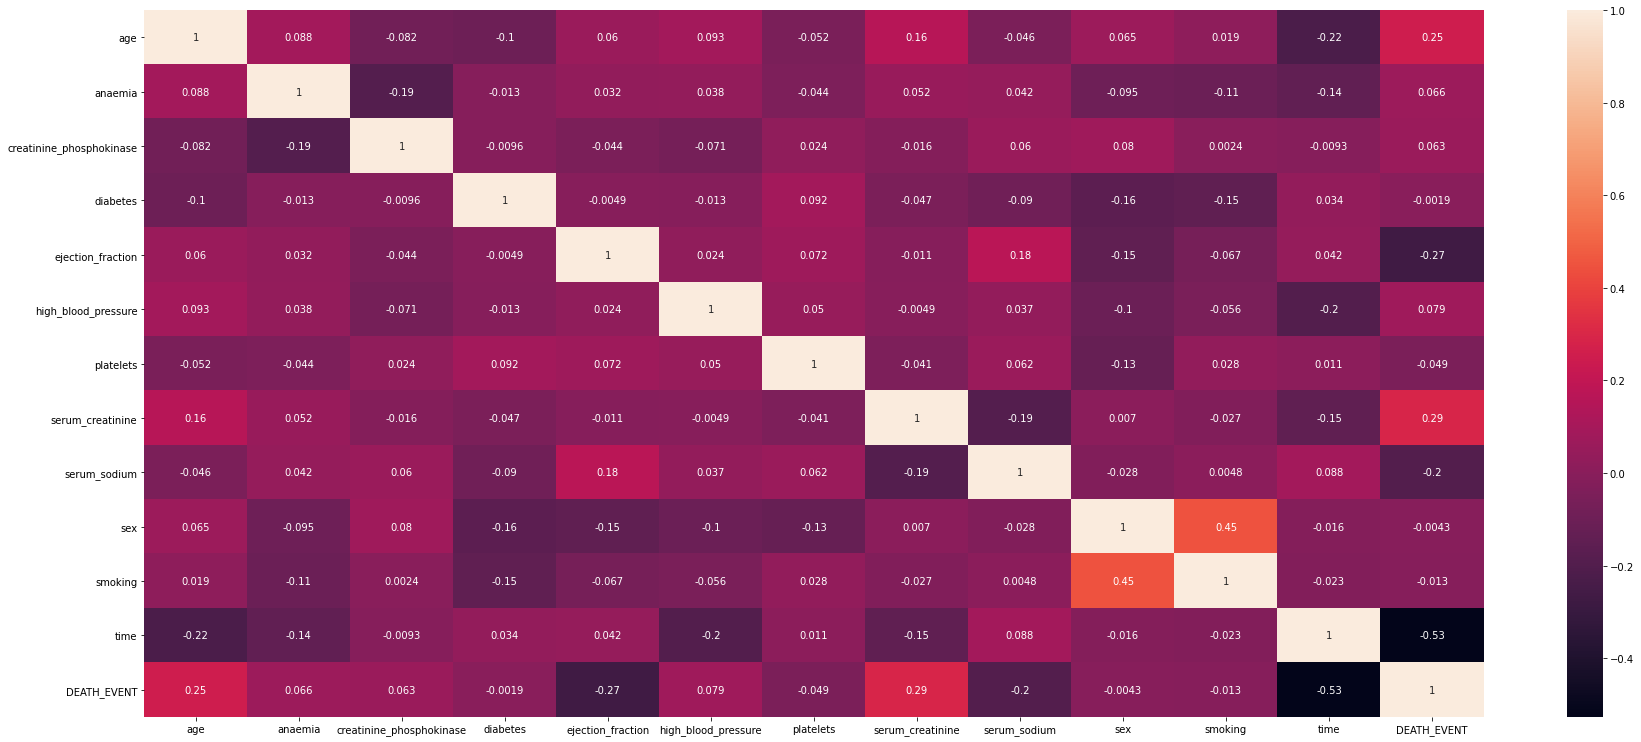

In [ ]:
plt.figure(figsize=(30,13))
sns.heatmap(heart_data.corr(),annot=True)

**DATA MODELING**

**TRAIN TEST SPLIT**

In [ ]:
Features = ['time','ejection_fraction','serum_creatinine','age']
X = heart_data[Features]
Y = heart_data["DEATH_EVENT"]

In [ ]:
X.head()

,time,ejection_fraction,serum_creatinine,age
0,4,20,1.9,75.0
1,6,38,1.1,55.0
2,7,20,1.3,65.0
3,7,20,1.9,50.0
4,8,20,2.7,65.0


In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [ ]:
heart_data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=2698)

In [ ]:
accuracy_list = []

**SUPPORT VECTOR CLASSIFICATION**

In [ ]:
h_data=SVC()
h_data.fit(X_train,Y_train)
h_data_pred= h_data.predict(X_test)
sv_clf_acc = accuracy_score(Y_test,h_data_pred)
accuracy_list.append(100* sv_clf_acc)

In [ ]:
print( "Accuracy of SVC is : ", "{:.2f}%".format(100* sv_clf_acc))

Accuracy of SVC is :  91.67%


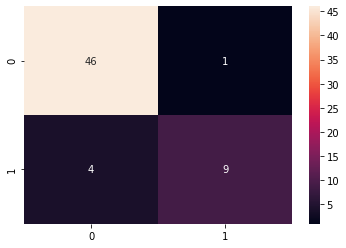

In [ ]:
cm = confusion_matrix(Y_test,h_data_pred)
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(Y_test,h_data_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.90      0.69      0.78        13

    accuracy                           0.92        60
   macro avg       0.91      0.84      0.87        60
weighted avg       0.92      0.92      0.91        60



In [ ]:
min_train=X_train.min()
min_train

time                  4.0
ejection_fraction    14.0
serum_creatinine      0.5
age                  40.0
dtype: float64

**PERCEPTRON**

In [ ]:
heart_data=pd.read_csv("heart_failure_clinical_records.csv")
heart_data.head()
Features = ['time','ejection_fraction','serum_creatinine','age']
X = heart_data[Features]
y = heart_data["DEATH_EVENT"]

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 0 1 1 0 0]
Perceptron classification accuracy 79.16666666666666


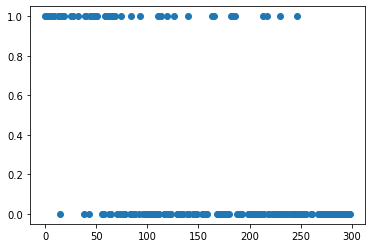

In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

p = Perceptron(max_iter=500, eta0=0.5, random_state=0)
p.fit(X_train, y_train)
predictions = p.predict(X_test)
print(predictions)

print("Perceptron classification accuracy", accuracy(y_test, predictions)*100)

plt.scatter(X_train.index,y_train.values)
plt.show()

**SELF ORGANISING MAPS**

In [ ]:
h_data=pd.read_csv("heart_failure_clinical_records.csv")
h_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
dataset=h_data.drop(['DEATH_EVENT'],axis=1)

In [ ]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [ ]:
standard=StandardScaler()
cleanDataset=pd.DataFrame(standard.fit_transform(dataset))
cleanDataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


In [ ]:
pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.6-cp36-none-any.whl size=8525 sha256=161642d2d6bda13bc798da69c765b399e9eb2ab8c2ea356845614b6294248a0e
  Stored in directory: /root/.cache/pip/wheels/b8/c6/01/330066e36e1f7c826c96f656f9185822cfcdef0591315949ea
Successfully built minisom


In [ ]:
from minisom import MiniSom
from matplotlib.gridspec import GridSpec
som=MiniSom(10,10,12,sigma=0.25,neighborhood_function='gaussian')
som.train_random(cleanDataset.to_numpy(),30000)

In [ ]:
target=h_data.DEATH_EVENT.astype('category').cat.codes
labels_map=som.labels_map(cleanDataset.to_numpy(),target)
label_names=np.unique(target)

In [ ]:
target

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Length: 299, dtype: int8

In [ ]:
labels_map

defaultdict(list,
            {(0, 0): Counter({1: 1}),
             (0, 1): Counter({1: 2}),
             (0, 2): Counter({1: 1}),
             (0, 3): Counter({0: 1, 1: 1}),
             (0, 4): Counter({0: 1}),
             (0, 5): Counter({1: 1}),
             (0, 6): Counter({1: 1}),
             (0, 7): Counter({0: 4, 1: 4}),
             (0, 8): Counter({0: 6}),
             (0, 9): Counter({0: 1, 1: 1}),
             (1, 0): Counter({0: 4}),
             (1, 1): Counter({1: 1}),
             (1, 2): Counter({0: 3}),
             (1, 3): Counter({0: 1}),
             (1, 4): Counter({0: 1}),
             (1, 5): Counter({0: 2, 1: 1}),
             (1, 6): Counter({0: 2, 1: 2}),
             (1, 7): Counter({0: 3}),
             (1, 8): Counter({1: 1}),
             (1, 9): Counter({0: 5}),
             (2, 0): Counter({0: 1}),
             (2, 1): Counter({0: 2, 1: 2}),
             (2, 2): Counter({0: 8}),
             (2, 3): Counter({0: 1, 1: 3}),
             (2, 4): Counter

In [ ]:
label_names

array([0, 1], dtype=int8)

<function matplotlib.pyplot.show>

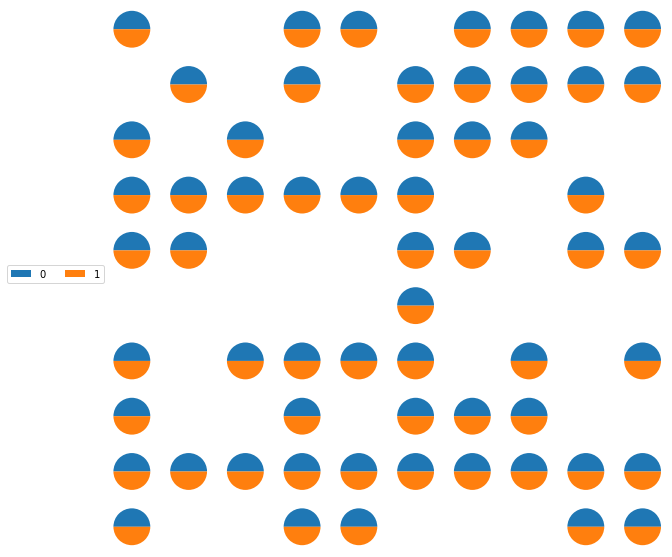

In [ ]:
plt.figure(figsize=(10,10))
the_grid=GridSpec(10,10)
for position in labels_map.keys():
  label_fracs=[labels_map[position][1] for l in label_names]
  plt.subplot(the_grid[9-position[1],position[0]],aspect=1)
  patches,texts=plt.pie(label_fracs)
plt.legend(patches,label_names,bbox_to_anchor=(0,1.5),ncol=3)
plt.show

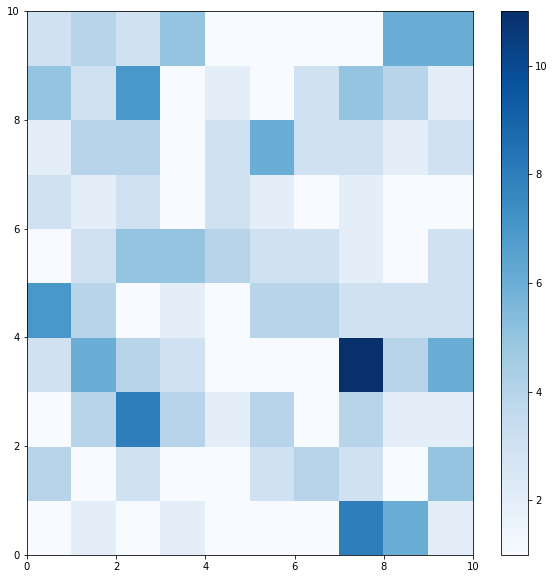

In [ ]:
plt.figure(figsize=(10,10))
frequencies=np.zeros((10,10))
for position,values in som.win_map(cleanDataset.to_numpy()).items():
  frequencies[position[0],position[1]] = len(values)
plt.pcolor(frequencies,cmap='Blues')
plt.colorbar()
plt.show()

**LEARNING VECTOR QUANTIZATION**

In [ ]:
pip install neupy

     |████████████████████████████████| 235kB 2.6MB/s 
     |████████████████████████████████| 92.6MB 42kB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 368kB 40.8MB/s 
     |████████████████████████████████| 3.2MB 41.7MB/s 
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progressbar2-3.38.0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/usr/local/lib/p


Main information

[ALGORITHM] LVQ

[OPTION] minstep = 1e-05
[OPTION] n_classes = 2
[OPTION] n_inputs = 11
[OPTION] n_subclasses = 100
[OPTION] n_updates_to_stepdrop = 15000
[OPTION] prototypes_per_class = None
[OPTION] show_epoch = 20
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.001
[OPTION] verbose = True
[OPTION] weight = None

#1 : [12 ms] train: 0.387960


#20 : [13 ms] train: 0.381271


#40 : [13 ms] train: 0.387960


#60 : [12 ms] train: 0.387960


#80 : [19 ms] train: 0.384615


#100 : [12 ms] train: 0.381271


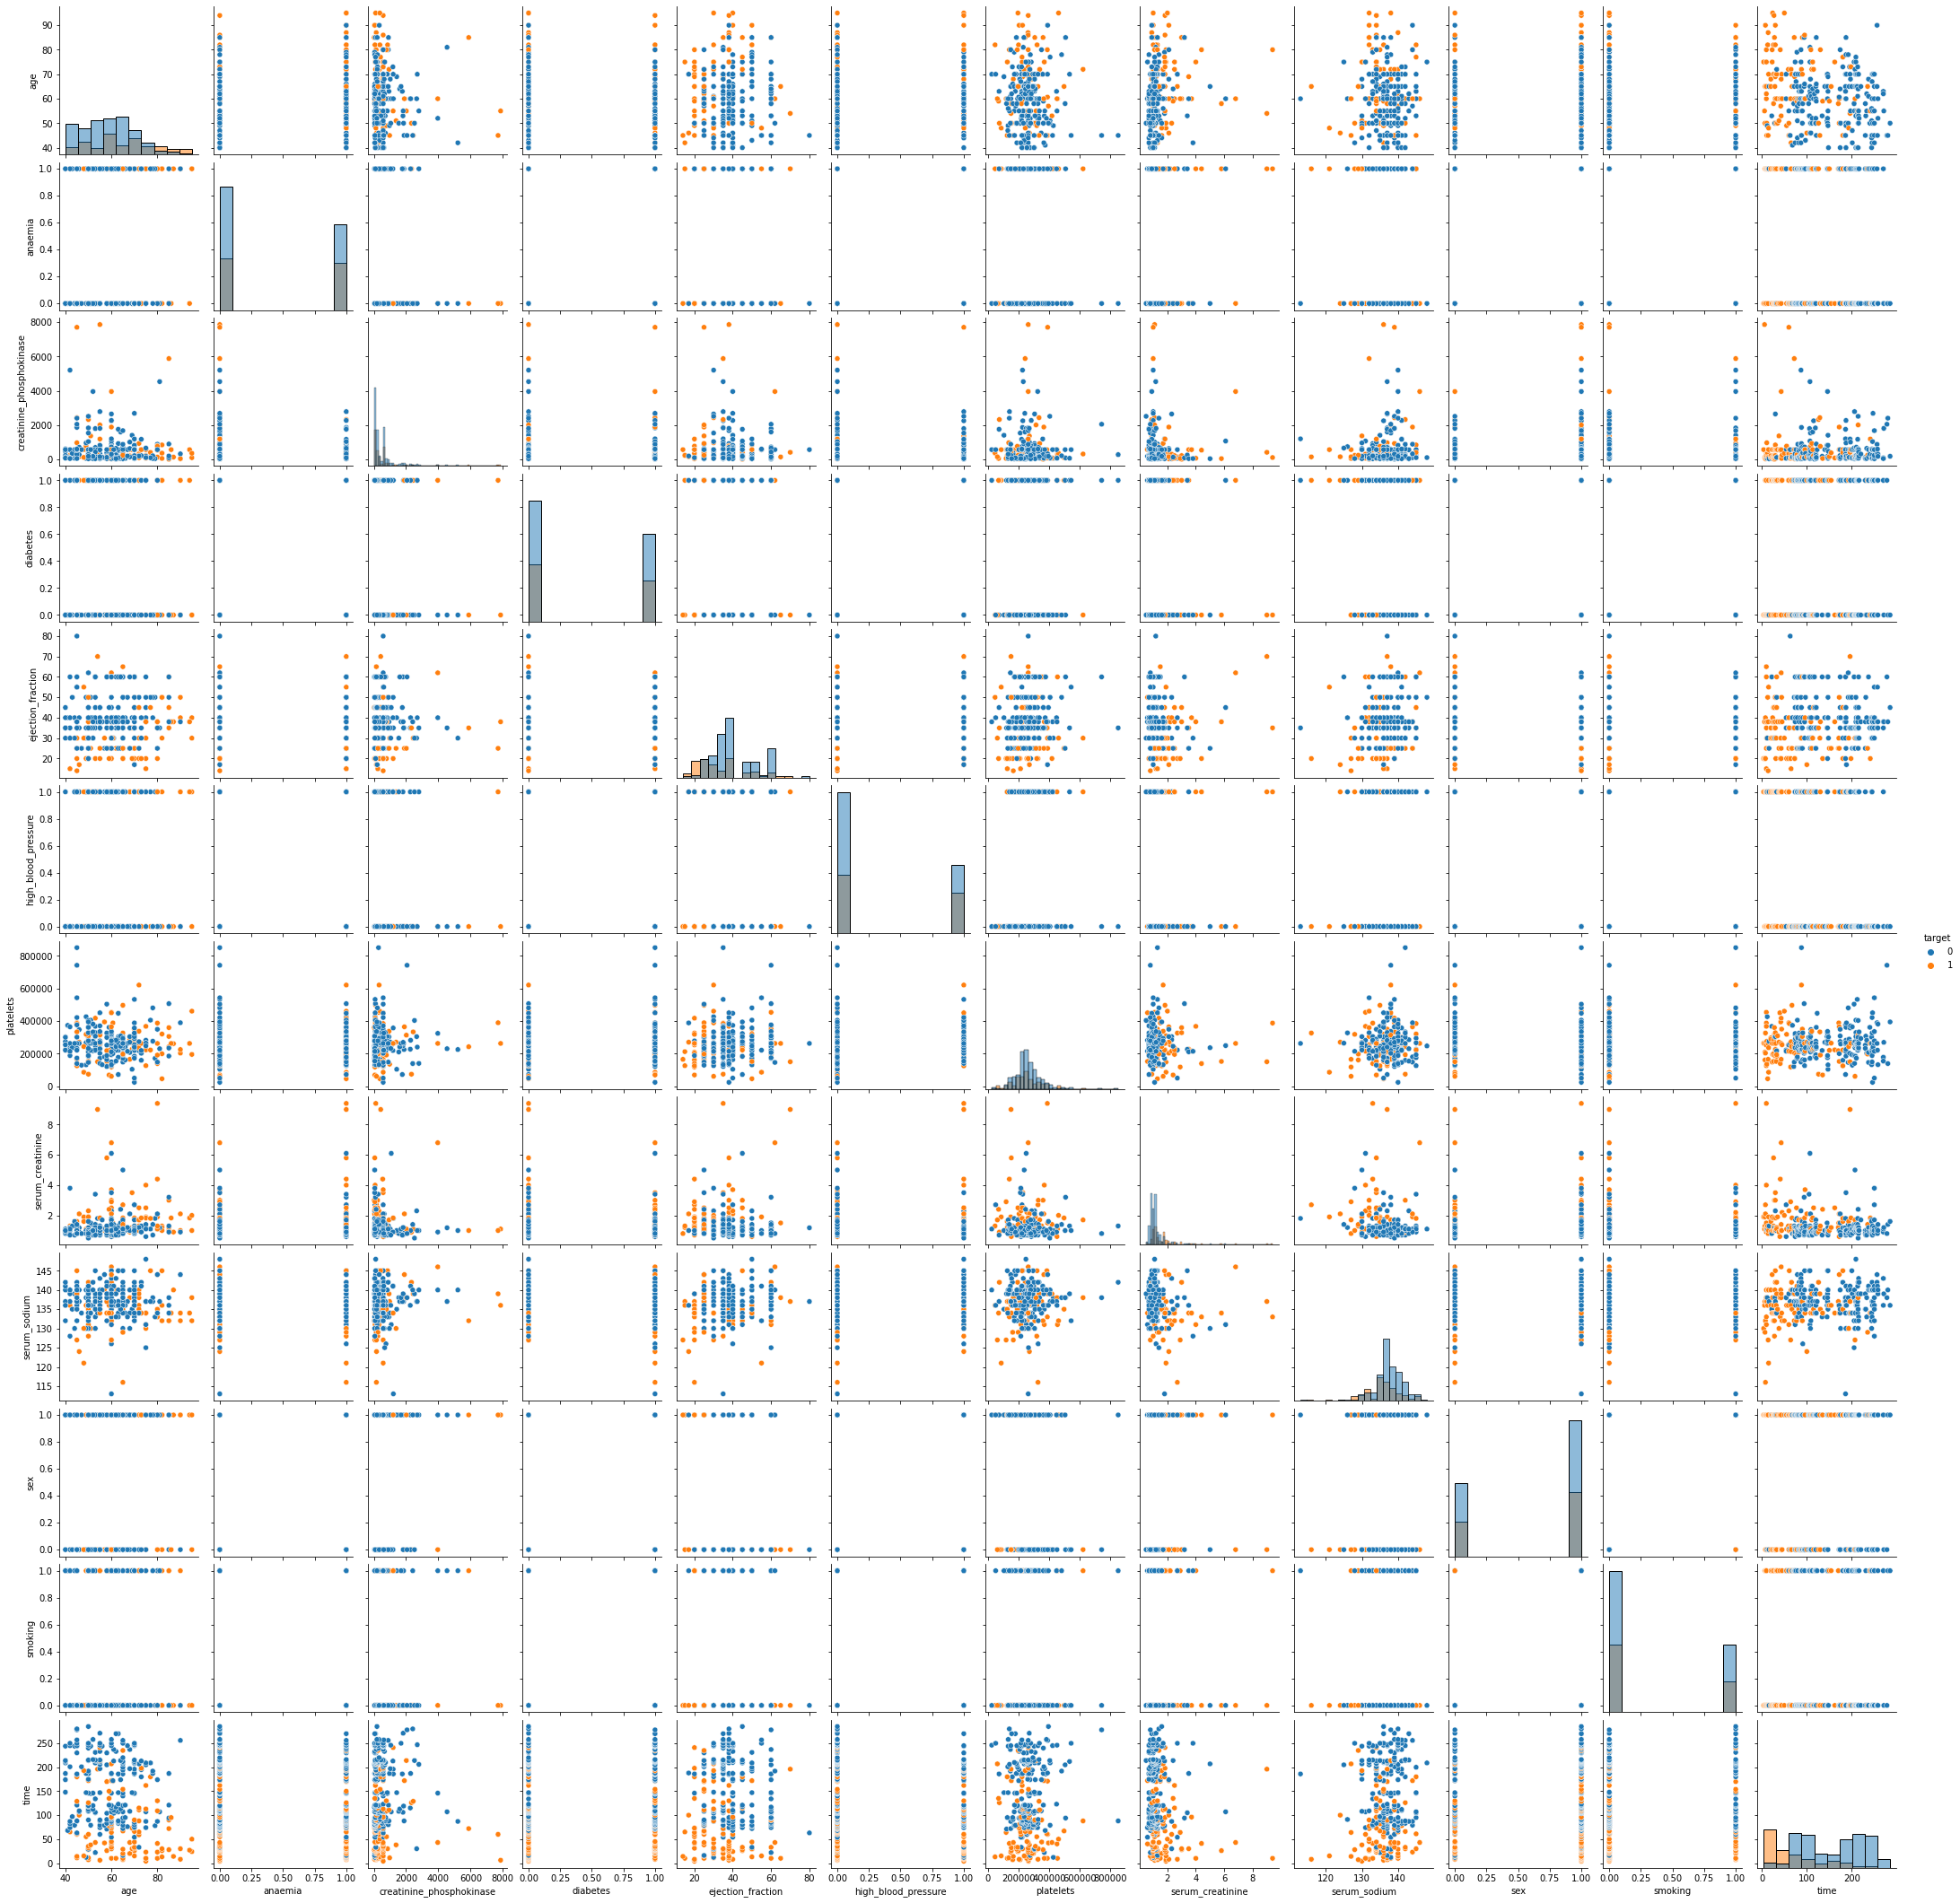

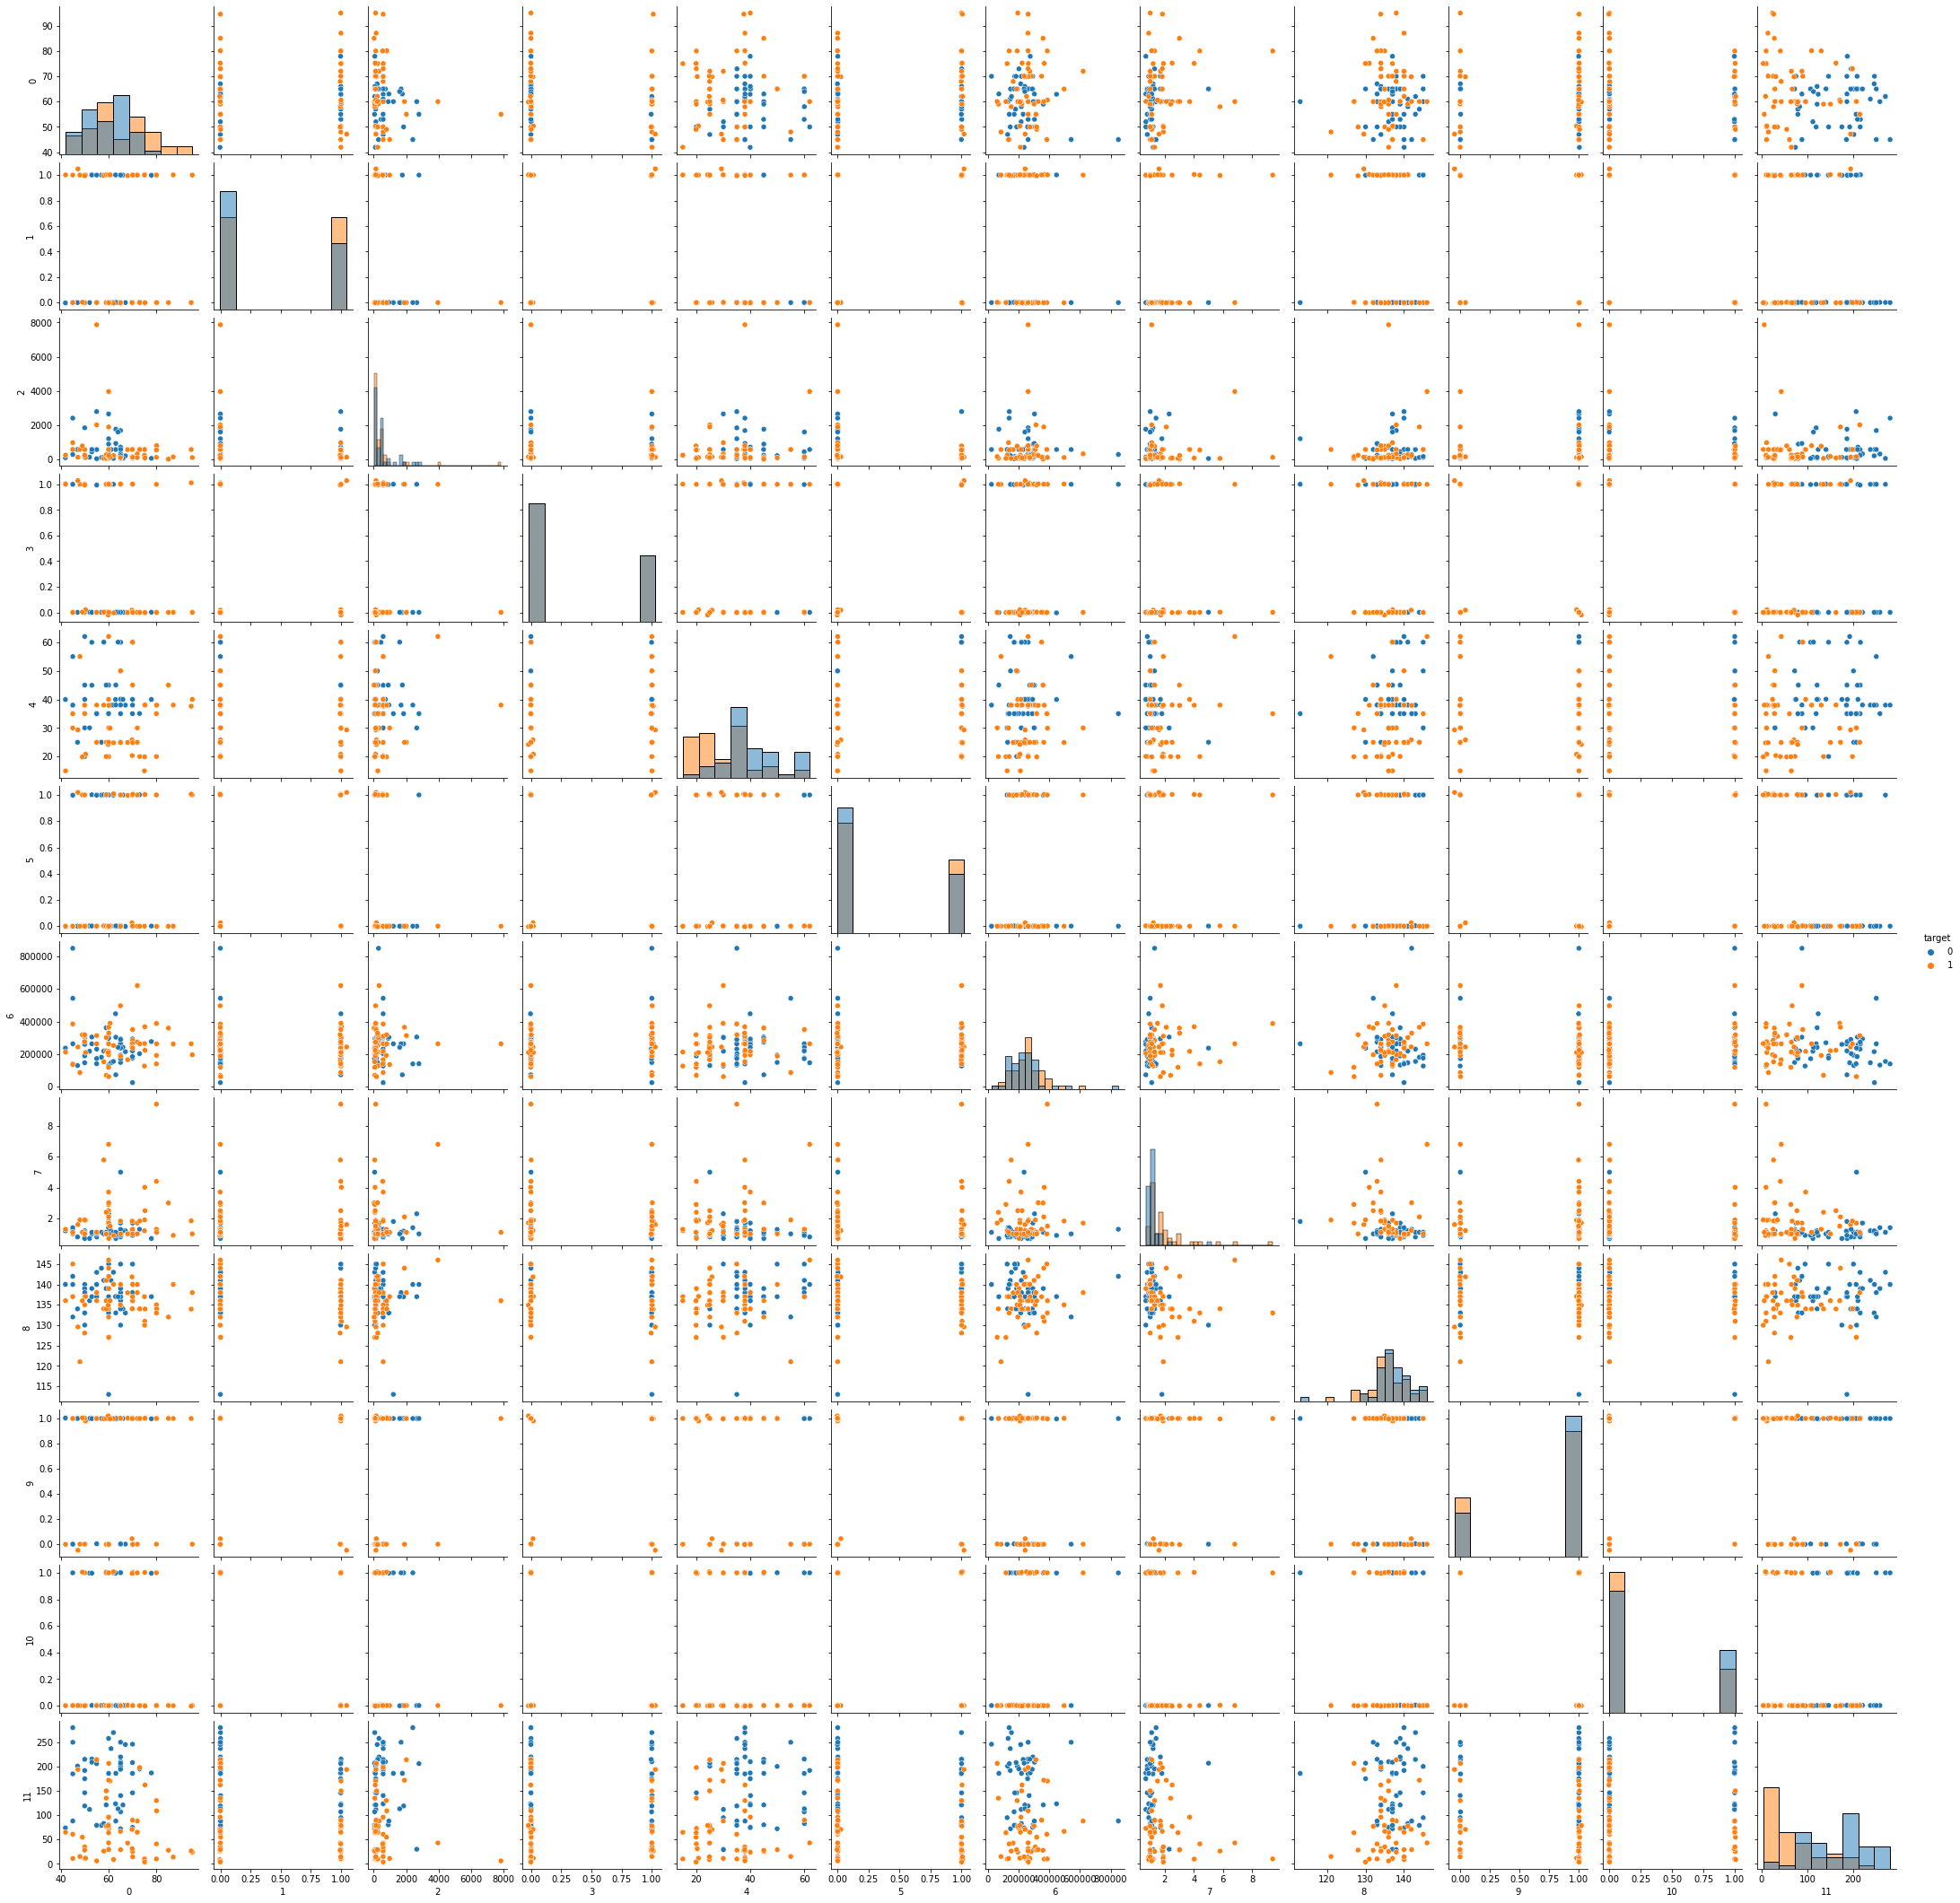

In [ ]:
from neupy import algorithms, utils


utils.reproducible()


def plot_scattermatrix(data, target):
    df = pd.DataFrame(data)
    df['target'] = target
    return sns.pairplot(df, hue='target', diag_kind='hist')


if __name__ == '__main__':
    dataset = pd.read_csv("heart_failure_clinical_records.csv")
    data, target = h_data.drop(['DEATH_EVENT'],axis=1), dataset.DEATH_EVENT
    

    lvqnet = algorithms.LVQ(
        # number of features
        n_inputs=11,

        # number of data points that we want
        # to have at the end
        n_subclasses=100,

        # number of classes
        n_classes=2,

        verbose=True,
        show_epoch=20,

        step=0.001,
        n_updates_to_stepdrop=150 * 100,
    )
    lvqnet.train(data, target, epochs=100)
    
    plot_scattermatrix(data, target)
    plot_scattermatrix(data=lvqnet.weight, target=lvqnet.subclass_to_class)
    plt.show()